GOALS
1. Build an AlphaVantage API class for getting stock data.
2. Build an SQL Repository class for data storage.
3. Calculate and compare returns for two companies.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from data import AlphaVantageAPI
from data import SQLRepository

In [2]:
# Create instance of alphavantahge API
av = AlphaVantageAPI()
print("av type:", type(av))

av type: <class 'data.AlphaVantageAPI'>


AlphaVantageAPI: Get Daily Method

In [3]:
# Fetch stock data from 'Airbnb' company
ticker = "ABNB"
df_airbnb = av.get_daily(ticker=ticker)

# Does 'get daily' method retutn a dataframe
assert isinstance(df_airbnb, pd.DataFrame)

# Does dataframe have 5 columns
assert df_airbnb.shape[1] == 5

# Does a dataframe have a datetime index
assert isinstance(df_airbnb.index, pd.DatetimeIndex)

# Is the index name "date"
assert df_airbnb.index.name == "date"

# Does Dataframe have correct column names
assert df_airbnb.columns.to_list() == [' open', ' high', ' low', ' close', ' volume']



SQL Repository Class:
Connection to Database

In [4]:

connection = sqlite3.connect("/home/denis/Stock-Data/sqlite.db", check_same_thread=False)
print("connection type:", type(connection))

connection type: <class 'sqlite3.Connection'>


SQLRepository Class: Writting Tests

In [5]:
# Import class definition
from data import SQLRepository

# Create an instance of class
repo = SQLRepository(connection=connection)

# Does 'repo' have a connection attribute
assert hasattr(repo, "connection")

# Is the attribute connection a sqlite connection
assert isinstance(repo.connection, sqlite3.Connection)

In [6]:
print(dir(repo))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'connection', 'insert_table', 'read_table']


In [7]:
response = repo.insert_table(table_name=ticker, records=df_airbnb, if_exists="replace")

# Does your response return a dictionary
assert isinstance(response, dict)


Querry SQL Database

In [8]:
pip install ipython-sql


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Load the SQL extension
%load_ext sql

# Connect to your SQLite database
%sql sqlite:////home/denis/Stock-Data/sqlite.db


In [10]:
%%sql
SELECT *
FROM "ABNB"
LIMIT 5

 * sqlite:////home/denis/Stock-Data/sqlite.db
Done.


date,open,high,low,close,volume
2024-09-26 00:00:00,132.706,133.34,129.146,129.25,3825948.0
2024-09-25 00:00:00,131.31,131.9,130.3,130.71,2310696.0
2024-09-24 00:00:00,130.58,131.67,129.59,131.48,4189105.0
2024-09-23 00:00:00,131.5,131.64,128.9,129.03,3682591.0
2024-09-20 00:00:00,129.83,131.95,129.03,131.18,12476321.0


Read SQL data with pandas

In [11]:
# Define sql query as a string
sql_query = 'SELECT * FROM "ABNB"'

df_airbnb_test = pd.read_sql(
    sql_query,
    con=connection, 
    parse_dates=["date"], 
    index_col="date"
)

df_airbnb_test.head()

,open,high,low,close,volume
date,,,,,
2024-09-26,132.706,133.34,129.146,129.25,3825948.0
2024-09-25,131.310,131.90,130.300,130.71,2310696.0
2024-09-24,130.580,131.67,129.590,131.48,4189105.0
2024-09-23,131.500,131.64,128.900,129.03,3682591.0
2024-09-20,129.830,131.95,129.030,131.18,12476321.0


SQLRepository: Read Table Method

In [15]:
df_goldman = repo.read_table(table_name="ABNB", limit=2500)
df_goldman.head()

,open,high,low,close,volume
date,,,,,
2024-09-26,132.706,133.34,129.146,129.25,3825948.0
2024-09-25,131.310,131.90,130.300,130.71,2310696.0
2024-09-24,130.580,131.67,129.590,131.48,4189105.0
2024-09-23,131.500,131.64,128.900,129.03,3682591.0
2024-09-20,129.830,131.95,129.030,131.18,12476321.0


Comparing Stock Returns

Insert Goldman Sacks ETF Gold Stock Data into Dataframe

In [17]:
ticker = "AAAU"

# Get Goldman ETF Gold data from av
airbnb_records = av.get_daily(ticker=ticker)

# Insert AIRBNB records into the database
repo.insert_table(table_name=ticker, records=airbnb_records, if_exists="replace")
response

{'transaction_successful': True, 'records_inserted': 954}

Read AIRBNB Stock data from database

In [18]:
ticker = "AAAU"
df_goldman = repo.read_table(table_name=ticker, limit=2500)
df_goldman.head()

,open,high,low,close,volume
date,,,,,
2024-09-26,26.39,26.4790,26.2500,26.440,2628486.0
2024-09-25,26.35,26.3800,26.2079,26.310,2592285.0
2024-09-24,26.06,26.3507,26.0350,26.340,1971926.0
2024-09-23,26.01,26.0660,25.9650,25.975,2005833.0
2024-09-20,25.80,25.9750,25.7450,25.925,2186413.0


Plot Goldman Sacks ETF Gold Closing Price

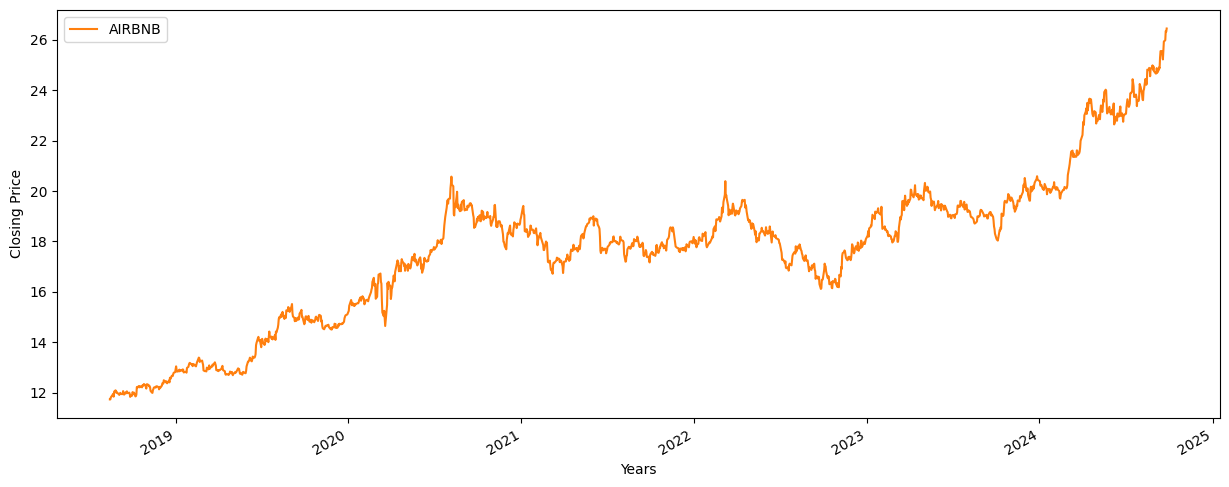

In [19]:
fig, ax = plt.subplots(figsize = (15, 6))

# Plot airbnb closing price
df_goldman[" close"].plot(ax=ax, label="AIRBNB", color = "C1")

# Label axes
plt.xlabel("Years")
plt.ylabel("Closing Price")

# Add legend
plt.legend();

Compare AIRBNB and Goldman Sachs Gold ETF

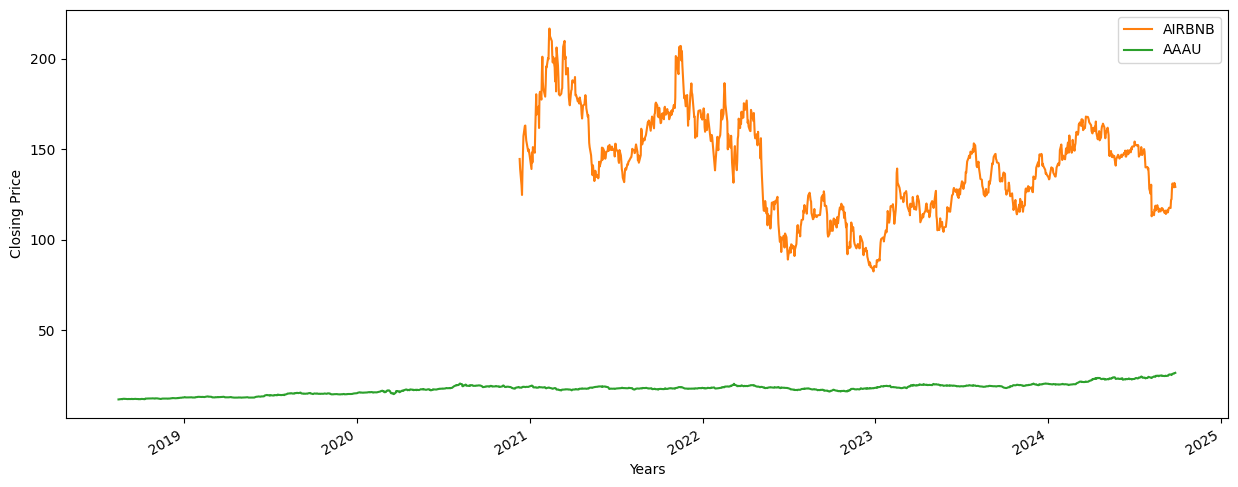

In [28]:
fig, ax = plt.subplots(figsize = (15, 6))

# Plot airbnb and AAAU closing price
df_airbnb[" close"].plot(ax=ax, label="AIRBNB", color = "C1")
df_goldman[" close"].plot(ax=ax, label="AAAU", color = "C2")

# Label axes
plt.xlabel("Years")
plt.ylabel("Closing Price")

# Add legend
plt.legend();

Calculate Goldman Sacks Gold ETF Returns

In [23]:
# Sort Datetime ascending by date
df_goldman.sort_index(ascending=True, inplace=True)

# Create return column
df_goldman["return"] = df_goldman[" close"].pct_change() * 100

Calculate AIRBNB Returns

In [26]:
# Sort Datetime ascending by date
df_airbnb.sort_index(ascending=True, inplace=True)

# Create return column
df_airbnb["return"] = df_airbnb[" close"].pct_change() * 100# Sort Datetime ascending by date
df_goldman.sort_index(ascending=True, inplace=True)

# Create return column
df_goldman["return"] = df_goldman[" close"].pct_change() * 100

Calculate AIRBNB and Goldman Sacks Gold ETF Returns

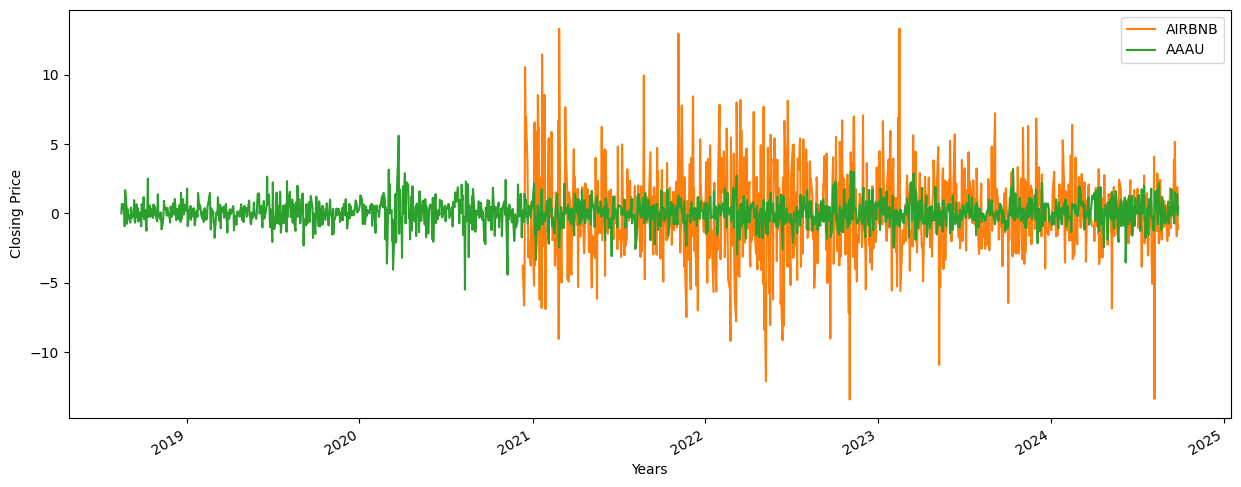

In [29]:
fig, ax = plt.subplots(figsize = (15, 6))

# Plot airbnb and AAAU closing price
df_airbnb["return"].plot(ax=ax, label="AIRBNB", color = "C1")
df_goldman["return"].plot(ax=ax, label="AAAU", color = "C2")

# Label axes
plt.xlabel("Years")
plt.ylabel("Closing Price")

# Add legend
plt.legend();